# Lab 2: Classification 

In this assignment you will experiment with five basic classification models from machine learning and statistical learning. The models are provided in the table below together with their names in scikit-learn:

Run the Nearest Neighbor classifier for the parameter k equal to 1, 5, 11, and 21, and record 10-fold cross-validation accuracy rate and confusion matrices for the data sets from Experiment 1. (Note that the parameter k is the parameter n_neighbors in sklearn.neighbors.KNeighborsClassifier().)


exp1a.csv
exp1b.csv
exp1c.csv

In [1]:
import pandas as pd 
import numpy as np
from numpy import array
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict


In [2]:
d1a = pd.read_csv('exp1a.csv')
d1b = pd.read_csv('exp1b.csv')
d1c = pd.read_csv('exp1c.csv')

d2a = pd.read_csv('exp2a.csv')
d2b = pd.read_csv('exp2b.csv')

d3a = pd.read_csv('exp3a.csv')
d3b = pd.read_csv('exp3b.csv')
d3c = pd.read_csv('exp3c.csv')
d3d = pd.read_csv('exp3d.csv')

In [3]:
# Define function to get x, y and class values from each dataste
def clean_data(data):
    x = data.iloc[0:,0]
    y = data.iloc[0:,1]
    clas = data.iloc[0:,2]
    return x, y, clas

In [4]:
def scatter_plot_data(data):
    plt.figure(figsize=(3,3))
    x, y , clas = clean_data(data)
    col = np.where(clas ==1, 'lightblue', 'orange')
    plt.scatter(x,y, color = col, alpha=0.9)
    plt.title('Scatter Plot')
    plt.xlabel('x')
    plt.ylabel('y')

## Assignment 1

#### (a) Visualize the data sets from Experiment 1 (they are given with two input numeric variables).

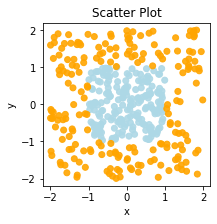

In [5]:
scatter_plot_data(d1a)

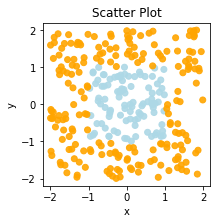

In [6]:
scatter_plot_data(d1b)

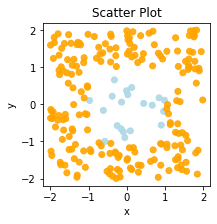

In [7]:
scatter_plot_data(d1c)

#### (b) For each of the data sets, how does the 10-fold cross-validation accuracy rates and confusion matrices vary as k increases? Explain this trend.


- Define function to build confusion matrix for the datasets


In [8]:
def build_confuision_matrix(knn, data, clas):
    y_pred = cross_val_predict(knn, data, clas, cv = 10) #10-fold cross-validation
    conf_mat = confusion_matrix(clas, y_pred)
    return conf_mat

- Define function to build any classifier

In [9]:
def generic_classifier(classifier, data):
    clas = data.iloc[:,data.shape[1]-1]
    data = data.iloc[:,0:data.shape[1]-1]
    cv_scores = cross_val_score(classifier, data, clas, cv=10)
    conf = build_confuision_matrix(classifier, data, clas)
    acc = round(np.mean(cv_scores)*100,2)
    return acc, conf


- Define function to evaluate each classifier 

In [10]:
def class_eval(data, k): 
    accuracies = [] # initialize
    confusion_matrices = [] # initialize
    for n in k : 
        knn_cv = KNeighborsClassifier(n_neighbors=n)
        acc, conf = generic_classifier(knn_cv, data)
        accuracies.append(acc)
        confusion_matrices.append(conf)
        
    return accuracies, confusion_matrices

- Define frames for each dataset from experiment 1 

In [11]:
frames = [(d1a, 'Exp1a'), (d1b, 'Exp1b'), (d1c, 'Exp1c')]
k = [1,5,11,21] # number of neighbours to try out
for df, index in frames: 
    accuracies, confusion_matrices = class_eval(df, k)
    for i in range(len(k)): 
        print('{}: kNN mean accuracy with {} neighbours:{}%'.format(index, k[i], accuracies[i]))
        print(confusion_matrices[i])
    print('')

Exp1a: kNN mean accuracy with 1 neighbours:97.75%
[[194   6]
 [  3 197]]
Exp1a: kNN mean accuracy with 5 neighbours:95.25%
[[183  17]
 [  2 198]]
Exp1a: kNN mean accuracy with 11 neighbours:94.25%
[[177  23]
 [  0 200]]
Exp1a: kNN mean accuracy with 21 neighbours:92.75%
[[171  29]
 [  0 200]]

Exp1b: kNN mean accuracy with 1 neighbours:96.0%
[[193   7]
 [  5  95]]
Exp1b: kNN mean accuracy with 5 neighbours:96.67%
[[194   6]
 [  4  96]]
Exp1b: kNN mean accuracy with 11 neighbours:94.67%
[[190  10]
 [  6  94]]
Exp1b: kNN mean accuracy with 21 neighbours:94.0%
[[190  10]
 [  8  92]]

Exp1c: kNN mean accuracy with 1 neighbours:94.09%
[[194   6]
 [  7  13]]
Exp1c: kNN mean accuracy with 5 neighbours:97.73%
[[200   0]
 [  5  15]]
Exp1c: kNN mean accuracy with 11 neighbours:94.55%
[[200   0]
 [ 12   8]]
Exp1c: kNN mean accuracy with 21 neighbours:93.64%
[[200   0]
 [ 14   6]]



Text(0, 0.5, 'Accuracies')

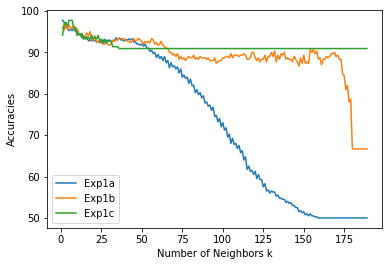

In [12]:
k_plot = range(1,190)

legends = []
for df, index in frames: 
    accuracies, confusion_matrices = class_eval(df, k_plot)
    ex, = plt.plot( k_plot, accuracies, label = index)
    legends.append(ex)
plt.legend(handles = legends)
plt.xlabel('Number of Neighbors k')
plt.ylabel('Accuracies')

###### HOW PERFORMANCE CHANGES WITH K FOR EACH DS 

The above plot shows how accuracy changes with respect to the increasing number of neighbors for each dataset. We can see how in general, as k increases the accuracies for each dataset decrease. However, as the datasets have different structures and thus their individual accuracies are very much different for each k. 
- **Exp1a**: Consists of 200 negative and 200 positively classified observations. As the number of neighbors k increases, so does the number of negatively classified istances and as k reaches 150 the accuracy settles around 50%. 

- **Exp1b**: Consists of 100 datapoints for each class (positive & negative). In this case, the accuracy takes longer to converge. For k > 175 (circa) the accuracy suddenly drops from around 90% to 70%. This is due to the number of istances in the dataset. 

- **Exp1c**: Consists of 100 positive and 20 negatively classified istances, and is thus very much imbalanced w.r.t. the previous ones. The accuracy quickly converges for k > 40 (circa) and hence for greater ks no istance will be classified as negative since the positively classified ones will "overweight" the negative ones. 


The main difference among the datsets is in the sense that Exp1c data is very much unbalanced with respect to the first two datasets. kNN assigns a class label according to a "majority vote" in terms of distance among the k nearest neighbours of that particular instance. Since we're now dealing with a binary classification, kNN assumes that the space of all samples can be partitioned in exactly two disjoint subspaces. In the case of Exp1a and Exp1b where the number of istances belonging to each class is the same it would be as if the subspaces were sampled uniformly. However, even Exp1a and Exp1b are both balanced datasets their difference lies in the nuber of observations with Exp1a containing more instances than Exp1b. For Exp1c, if the assumption of uniform sampling still holds then the probability that the kNN of any datapoint will belong to the class containing more instances becomes higher. In general, for an unbalanced dataset it may be the case that the closest neighbor (of a given instance) may still belong to the minority class but if the maority of points belongs to the class having a higher density that point will be missclassified. Thus, a lower number of neighbours will yield a better accuracy. 




#### (c) For each k Nearest Neighbor classifier (k in {1, 5, 11, 21}), how does the 10-fold cross-validation accuracy rates and confusion matrices vary as k increases? Explain this trend.


In general we know how the number of chosen neighbors k controls for the flexibility of the kNN classifier. That is, the smaller the k the more flexible the classifier will be. In particular, for small values of k will lead to a higher variance and a smaller bias. 

From the accuracies estimated in point (b) we can se how: 
- for k=1 Exp1a is at is highest accuracy. Exp1b and Exp1c also have a good accuracy. 
- for k=5 Exp1b and Exp1c reach their highest accuracy each. Exp1a still has a good accuracy score. 
- for k = 11 as well as for k = 21 all accuracy start decreasing w.r.t. the very small previous values of k. The reason is due to both the argument made at the beginning of this answer and from the answers in point (b). 

As it was expected the different structure affects the kNN classifier level of accuracy for different values of k. 

#### (d) Repeat (b) and (c) for the Nearest Neighbor classifier that employs distance weighting by setting option weights ='distance'.  Comment on the change in the generalization performance of the classifiers from the unweighted version for the same values of k and the reason for this change.


In [13]:
def weight_class_eval(data, k): 
    x, y, clas = clean_data(df)
    accuracies = []
    confusion_matrices = []
    for n in k : 
        #kNN model with weights='distance'
        knn_w = KNeighborsClassifier(n_neighbors=n, weights= 'distance')
        # kNN on a 10-fold cross-validation
        cv_scores = cross_val_score(knn_w, list(zip(x,y)), clas, cv=10)
        conf, y_pred = build_confuision_matrix(knn_w, list(zip(x,y)), clas)
        accuracies.append(round(np.mean(cv_scores)*100,2)) 
        confusion_matrices.append(conf)
    return accuracies, confusion_matrices
        

In [14]:
for df, index in frames: 
    accuracies, conf = weight_class_eval(df, k)
    for i in range(len(k)): 
        print('{}: kNN mean accuracy with {} neighbours: {}%'.format(index, k[i], accuracies[i]))
        
        print(conf[i])
    print('')

Exp1a: kNN mean accuracy with 1 neighbours: 97.75%
[194   6]
Exp1a: kNN mean accuracy with 5 neighbours: 96.75%
[189  11]
Exp1a: kNN mean accuracy with 11 neighbours: 96.25%
[186  14]
Exp1a: kNN mean accuracy with 21 neighbours: 94.75%
[179  21]

Exp1b: kNN mean accuracy with 1 neighbours: 96.0%
[193   7]
Exp1b: kNN mean accuracy with 5 neighbours: 97.0%
[195   5]
Exp1b: kNN mean accuracy with 11 neighbours: 96.0%
[194   6]
Exp1b: kNN mean accuracy with 21 neighbours: 96.33%
[193   7]

Exp1c: kNN mean accuracy with 1 neighbours: 94.09%
[194   6]
Exp1c: kNN mean accuracy with 5 neighbours: 97.73%
[200   0]
Exp1c: kNN mean accuracy with 11 neighbours: 96.82%
[200   0]
Exp1c: kNN mean accuracy with 21 neighbours: 96.82%
[200   0]



Text(0, 0.5, 'Accuracies')

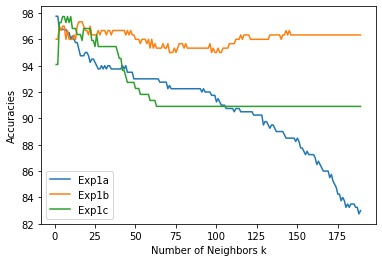

In [15]:
legends = []
for df, index in frames: 
    accuracies, confusion_matrices = weight_class_eval(df, k_plot)
    ex, = plt.plot( k_plot, accuracies, label = index)
    legends.append(ex)
plt.legend(handles = legends)
plt.xlabel('Number of Neighbors k')
plt.ylabel('Accuracies')

Weighted kNN ideas is to assign weights to the variables and meake use of these when computing distances among istances. Hence, weighted kNN takes in to accontu also the distances between each istance and its neighbor other then the nearest one. Thus, istances being further away will have a smaller influence on the classification. 

- Exp1a and Exp1b both converge at an higher accuracy with respect to Exp1c, which requires a definitely smaller number of neighbours to converge (around 60 in this case) to 91% of accuracy. 


- Thus, Weighted KNN performs better on sparse data


#### (e) Run decision trees and logistic regression classifiers on these data sets, and compare their performance on the three data sets, as well as with the various kNN classifiers. 

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


In [17]:
print('Decision Tree Classifier')
dt_class = DecisionTreeClassifier()
for df, index in frames: 
    acc, conf = generic_classifier(dt_class, df)
    print('{}: Decision Tree with accuracy:{} %'.format(index, acc))
    print('Confusion Matrix :') 
    print(conf)

print('')

print('Logistic Regression Classifier')
log_clf = LogisticRegression(random_state =0,solver='lbfgs', multi_class='multinomial')
for df, index in frames: 
    acc, conf = generic_classifier(log_clf, df)
    print('{}: Logistic Regression with accuracy:{} %'.format(index, acc))
    print('Confusion Matrix :') 
    print(conf)


Decision Tree Classifier
Exp1a: Decision Tree with accuracy:99.5 %
Confusion Matrix :
[[200   0]
 [  2 198]]
Exp1b: Decision Tree with accuracy:98.33 %
Confusion Matrix :
[[199   1]
 [  4  96]]
Exp1c: Decision Tree with accuracy:98.18 %
Confusion Matrix :
[[200   0]
 [  4  16]]

Logistic Regression Classifier
Exp1a: Logistic Regression with accuracy:52.25 %
Confusion Matrix :
[[ 99 101]
 [ 90 110]]
Exp1b: Logistic Regression with accuracy:66.67 %
Confusion Matrix :
[[200   0]
 [100   0]]
Exp1c: Logistic Regression with accuracy:90.91 %
Confusion Matrix :
[[200   0]
 [ 20   0]]


#### Explain the reasons for the observed differences in the generalization performance. 

It is evident how Decision Tree performs way better than Logistic Regression on all datasets. 

In general Logistic Regression and Decision Trees differ in how they generate decision boundaries. Hence, while Decision Trees tend to bisect the space into increasingly smaller regions, Logistic Regression fits one single line aiming at dividing the space in exactly two parts. From point a, we know how the classes in the three datasets belonging to experiment 1 are all separated by (somewhat clear) non-linear boundaries. Thus, Decision Trees tend to better capture the division leading to a superior classification performance. 

#### Visualize the errors of the decision trees and logistic regression classifiers on the data sets from Experiment 1.

- Define function for plotting the errors 

In [18]:
def plot_error(classifier, data):
    x,y,clas = clean_data(data) 
    plt.figure(figsize=(3,3))
    y_pred = cross_val_predict(classifier,list(zip(x,y)),clas,cv=10) 
    col = np.where(clas == 1, 'lightgreen', 'navajowhite') 
    col = np.where(clas != y_pred, 'red', col) 
    plt.scatter(x, y, color=col, alpha=0.8)
    plt.xlabel('x')
    plt.ylabel('y')   

- Decision Tree Errors (i.e. Red Ponts)

Text(0.5, 1.0, 'Decision Tree errors - Ex1a')

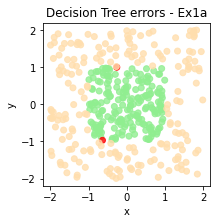

In [19]:
plot_error(dt_class, d1a)
plt.title('Decision Tree errors - Ex1a')

Text(0.5, 1.0, 'Decision Tree errors - Ex1b')

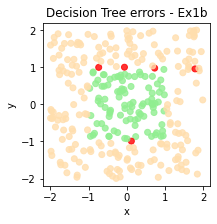

In [20]:
plot_error(dt_class, d1b)
plt.title('Decision Tree errors - Ex1b')

Text(0.5, 1.0, 'Decision Tree errors - Ex1c')

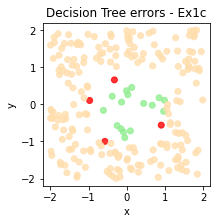

In [21]:
plot_error(dt_class, d1c)
plt.title('Decision Tree errors - Ex1c')

- Logistic Regression Errors (i.e. Red Ponts)

Text(0.5, 1.0, 'Decision Tree errors - Ex1a')

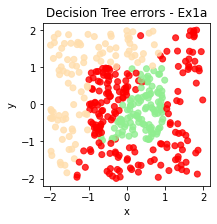

In [22]:
plot_error(log_clf, d1a)
plt.title('Decision Tree errors - Ex1a')

Text(0.5, 1.0, 'Decision Tree errors - Ex1b')

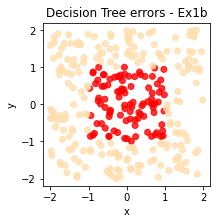

In [23]:
plot_error(log_clf, d1b)
plt.title('Decision Tree errors - Ex1b')

Text(0.5, 1.0, 'Decision Tree errors - Ex1c')

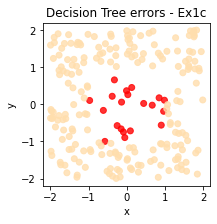

In [24]:
plot_error(log_clf, d1c)
plt.title('Decision Tree errors - Ex1c')

## Assigment 2

- Run all the five classifiers from Table 1 on the exp2a.csv data from the Experiment 2 cluster (see Table 2), and report 10-fold cross-validation accuracy rates and confusion matrices obtained

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import sklearn.linear_model
from sklearn.svm import SVC

dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
gaus = GaussianNB()
log = LogisticRegression(solver='lbfgs', max_iter=1000)
svc = SVC(gamma='scale', kernel='linear')

#### (a) What classifiers have a bad generalization performance and what classifiers have a good generalization performance? Comment on the collective characteristics of the variables in the exp2a.csv data that lead to such performance.

- Define a generic classifier to run a 10-fold cross-validation with scores and confusion matrix

In [26]:
def generic_classifier(classifier, data):
    clas = data.iloc[:,data.shape[1]-1]
    data = data.iloc[:,0:data.shape[1]-1]
    cv_scores = cross_val_score(classifier, data, clas, cv=10)
    conf = build_confuision_matrix(classifier, data, clas)
    acc = round(np.mean(cv_scores)*100,2)
    return acc, conf

In [27]:
accDTa, conf = generic_classifier(dt, d2a)
print('Accuracy Decision Trees with accuracy:{} %'.format(accDTa))
print(conf)
print('')

acc_knna, conf = generic_classifier(knn, d2a)
print('Accuracy Nearest Neighbour with accuracy:{} %'.format(acc_knna))
print(conf)
print('')

accNBa, conf = generic_classifier(gaus, d2a)
print('Accuracy Naive Bayes with accuracy:{} %'.format(accNBa))
print(conf)
print('')

acc_LRa, conf = generic_classifier(log, d2a)
print('Accuracy Logistic Regression with accuracy:{} %'.format(acc_LRa))
print(conf)
print('')

acc_SVMa, conf = generic_classifier(svc, d2a)
print('Accuracy Support Vector Machines with accuracy:{} %'.format(acc_SVMa))
print(conf)

Accuracy Decision Trees with accuracy:100.0 %
[[550   0]
 [  0 551]]

Accuracy Nearest Neighbour with accuracy:100.0 %
[[550   0]
 [  0 551]]

Accuracy Naive Bayes with accuracy:44.59 %
[[245 305]
 [305 246]]

Accuracy Logistic Regression with accuracy:44.59 %
[[245 305]
 [305 246]]

Accuracy Support Vector Machines with accuracy:54.59 %
[[300 250]
 [250 301]]


In general Exp2a seems to follow the rules 
- ($x_1$ and $x_4$) or ($x_2$ and $x_3$) => class 1
- ($x_1$ and $x_2$) or ($x_3$ and $x_4$) => class 2

- **Decision Trees**
The 100% accuracy is due to the fact that the Decision Tree is following the above rules. 

- **K Nearest Neighbor**
kNN is also 100% accurate. This is due to the fact that the datasets is dense as all variables in the dataset are either 0 or 1. 

- **Naive Bayes**
Naive Bayes classifier performs poorly. This can be due either to a low number of datapoints or to the absence of a clear trend. 

- **Logistic Regression**
Logistic Regressionis performs poorly due to the absence of a clear line able to separate the datapoints. 

- **Support Vector Machines**
SVM performs slightly better than Naive Bayes and Logistic Regression but stil not as well as Decision Trees or K-Nearest Neighbor. SVM with a linear kerner also tries to draw a line to separate the datapoitns, as there is no clear one it cannot reach a good accuracy.  

#### (b) Can you improve the classifiers from (a) that have a bad generalization performance by changing the parameters when training those classifiers?

In [28]:
np.seterr(divide = 'ignore') 

tuned_gaus = GaussianNB(priors = [0, 1])
acc, conf = generic_classifier(tuned_gaus, d2a)
print('Accuracy Tuned Naive Bayes with accuracy:{} %'.format(acc) )
print(conf)

np.seterr(divide = 'warn') 

tuned_svm = SVC(gamma='scale')
acc, conf = generic_classifier(tuned_svm, d2a)
print('Accuracy Tuned SVM with accuracy:{} %'.format(acc))
print(conf)

Accuracy Tuned Naive Bayes with accuracy:50.05 %
[[  0 550]
 [  0 551]]
Accuracy Tuned SVM with accuracy:100.0 %
[[550   0]
 [  0 551]]


**Naive Bayes** can be imporved by classifying everything as negative and bring the accuracy to 50.50%

As previously stated using a non-linear kernel for **Support Vector Machines** allows to reach a perfect classification. 

- Run all the five classifiers from Table 1 on the exp2b.csv data from the Experiment 2 cluster (see Table 2), and report 10-fold cross-validation accuracy rates and confusion matrices obtained.

In [29]:
accDTb, conf = generic_classifier(dt, d2b)
print('Accuracy Decision Trees with accuracy:{} %'.format(accDTb))
print(conf)
print('')

acc_knnb, conf = generic_classifier(knn, d2b)
print('Accuracy Nearest Neighbour with accuracy:{} %'.format(acc_knnb))
print(conf)
print('')

accNBb, conf = generic_classifier(gaus, d2b)
print('Accuracy Naive Bayes with accuracy:{} %'.format(accNBb))
print(conf)
print('')

acc_LRb, conf = generic_classifier(log, d2b)
print('Accuracy Logistic Regression with accuracy:{} %'.format(acc_LRb))
print(conf)
print('')

Accuracy Decision Trees with accuracy:74.0 %
[[392 158]
 [124 427]]

Accuracy Nearest Neighbour with accuracy:51.5 %
[[286 264]
 [270 281]]

Accuracy Naive Bayes with accuracy:36.33 %
[[197 353]
 [348 203]]

Accuracy Logistic Regression with accuracy:42.78 %
[[230 320]
 [310 241]]



I need to report that the following code for SVM on Exp2b doesn't output any result. 

In [30]:
#acc_SVMb, conf = generic_classifier(svc, d2b)
#print('Accuracy Support Vector Machines with accuracy:{} %'.format(acc_SVMb))
#print(conf)

In [31]:
dropDT = accDTa - accDTb
drop_knn = acc_knna - acc_knnb
dropNB = accNBa - accNBb
drop_LR = acc_LRa - acc_LRb
#drop_SVM = acc_SVMa - acc_SVMb


print('Decision Tree : Drop in accuracy of: {0:.2f}%'.format(dropDT))
print('K Nearest Neighbor : Drop in accuracy of: {0:.2f}%'.format(drop_knn))
print('Naive Bayes : Drop in accuracy of: {0:.2f}%'.format(dropNB))
print('Logistic Regression : Drop in accuracy of: {0:.2f}%'.format(drop_LR))
#print('Support Vector Machine: Drop in accuracy of: {0:.2f}%'.format(drop_SVM))

Decision Tree : Drop in accuracy of: 26.00%
K Nearest Neighbor : Drop in accuracy of: 48.50%
Naive Bayes : Drop in accuracy of: 8.26%
Logistic Regression : Drop in accuracy of: 1.81%


In [32]:
# acc_SVMb, conf = generic_classifier(svc, d2b)
# print('Accuracy Support Vector Machines with accuracy:{} %'.format(acc_SVMb))
# print(conf)
# drop_SVM = acc_SVMa - acc_SVMb
# print('Support Vector Machine: Drop in accuracy of: {0:.2f}%'.format(drop_SVM))

#### (c) Which classifier shows the biggest drop of the generalization performance compared to the exp2a.csv data, and what is the reason for this drop?

The biggest drops in accuracy occurred for the Decision Tree classifier (26.27%) and for k Nearest Neighbor (48.50%).  

The main cause of these rather large drops can be referred to as **curse of dimensionality**. That is, dealing with high dimensional data. In fact, Exp2b dataset contains 95 additional dimensions with respect to Exp1a.  In general, the additional dimensions affect the most those methods which “learn” by partitioning their space. The higher the dimension the more we need to fill the space that we’re optimizing. 

-	Since kNN heavily relies on distances among instances as the number of dimensions increases such distances become increasingly less representative. For kNN to work with high dimensions one needs a greater amount of points to cover more space in order for the distances to become more descriptive
-	Since Decision Trees directly partition the sample space at each note as it increases (though dimensions) so does the distance between each datapoint. Hence, it becomes harder to find a “good” split of the instances. 



#### (d) Which classifier shows the smallest drop of the generalization performance compared to the exp2a.csv data, and what is the reason for this drop compared with the classifier identified in (c)?

The smallest drops in accuracy occurred for Logistic Regression (1.81%) and Naive Bayes(8.26%). However, while the additional dimensions were the main reason for the poor performance of kNN and Decision Trees in Exp2b, these rather small drops are probably due to the poor performance Naive Bayes and Logistic Regression had also for Exp2a where dimension wasn't an issue. 

Thus as both Logistic Regression and Naive Bayes sort of failed for the first dataset of Experiment 2 due to the lack of a clear trend their performance with additional dimensions can hardly be improved. 
 

## Assignment 3

- Run Gaussian Naive Bayes, Nearest Neighbor (k in {1, 5}) and decision tree on all the datasets from the Experiment 3 cluster (see Table 2) and record 10-fold cross-validation accuracy rates obtained.

In [33]:
datasets = [(d3a, 'Exp3a'), (d3b, 'Exp3b'), (d3c, 'Exp3c'), (d3d, 'Exp3d')]
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_5 = KNeighborsClassifier(n_neighbors=5)

#dt_entropy = DecisionTreeClassifier(criterion='entropy')
dt = DecisionTreeClassifier()

In [34]:
for data, name in datasets: 
    acc, conf = generic_classifier(gaus, data)
    print('{}: Accuracy Naive Bayes: {}%'.format(name, acc))
    print(conf)
    acc, conf = generic_classifier(knn_1, data)
    print('{}: Accuracy kNN with 1 neighbor: {}%'.format(name, acc))
    print(conf)
    acc, conf = generic_classifier(knn_5, data)
    print('{}: Accuracy kNN with 5 neighbors: {}%'.format(name, acc))
    print(conf)
    acc, conf = generic_classifier(dt, data)
    print('{}: Accuracy Decision Tree: {}%'.format(name, acc))
    print(conf)
    print('')

Exp3a: Accuracy Naive Bayes: 95.9%
[[473  27]
 [ 14 486]]
Exp3a: Accuracy kNN with 1 neighbor: 98.8%
[[494   6]
 [  6 494]]
Exp3a: Accuracy kNN with 5 neighbors: 98.3%
[[490  10]
 [  7 493]]
Exp3a: Accuracy Decision Tree: 97.2%
[[480  20]
 [ 12 488]]

Exp3b: Accuracy Naive Bayes: 95.9%
[[483  17]
 [ 24 476]]
Exp3b: Accuracy kNN with 1 neighbor: 80.8%
[[403  97]
 [ 95 405]]
Exp3b: Accuracy kNN with 5 neighbors: 85.5%
[[430  70]
 [ 75 425]]
Exp3b: Accuracy Decision Tree: 71.4%
[[346 154]
 [129 371]]

Exp3c: Accuracy Naive Bayes: 92.2%
[[463  37]
 [ 41 459]]
Exp3c: Accuracy kNN with 1 neighbor: 73.0%
[[384 116]
 [154 346]]
Exp3c: Accuracy kNN with 5 neighbors: 79.9%
[[412  88]
 [113 387]]
Exp3c: Accuracy Decision Tree: 62.9%
[[316 184]
 [184 316]]

Exp3d: Accuracy Naive Bayes: 89.0%
[[447  53]
 [ 57 443]]
Exp3d: Accuracy kNN with 1 neighbor: 63.4%
[[319 181]
 [185 315]]
Exp3d: Accuracy kNN with 5 neighbors: 71.5%
[[364 136]
 [149 351]]
Exp3d: Accuracy Decision Tree: 55.3%
[[286 214]
 [230

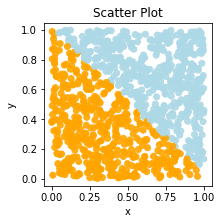

In [35]:
scatter_plot_data(d3a)

#### (a) How does the performance of the different classifiers compare for each dataset?

The added number of variables in Exp3b, Exp3c and Exp3d make it impossible to visualize the dataset in a nice way. From Exp3a datastet however we know how the classification follows a simple rule and from the above scatter plot we can see how the data can be separated in a linear way. 
- For Exp3a k Nearest Neighbour does a good job in classifying the istances with both k=1 and k=5. However, looking at the confusion matrix, with k=1 the classifier tends to overfit while with k=5 it reaches a better accuracy. Also Naive Bayes performs well since it a linear classifier based on probability. 
- For the other datasets we can see how accuracy scores for kNN and Decision Trees decrease as the number of dimensions in the datasets increase. Regarding Naive Bayes it is still able to reach good accuracy scores even if the number of dimensions increases since dimensionality doesn't affect the shape of the data. . 

#### (b) How does the performance of each classifier vary as the number of variables is increased from datasets exp3a.csv to exp3d.csv? Which properties of the classifiers lead to such a variation in performance?

**Gaussian Naive Bayes**
As stated in point (c) Gaussian Naive Bayes is able to keep a high accuracy for each datasets even if the number of dimensions is increased since dimensionality is not a factor affecting its perfomance as it is a probabilistic classifier.

**Decision Trees**
Decision Trees tend to build staircase functions trying to resemble as much as possible a linear function separating the data. The addition of variables increaes the function complexity resulting in the tree growing rapidly leading the accuracy score to decrease as the number of variables increases. 

**Nearest Neighbour**
The addition of vairables increases the distances among neighbours in the dataset thus leading its accuracy score to drop as the number of dimensions increases. Whithin this classifier we can see how in general it performs better for k=5 rather than k=1. 
As the number of dimensions increases kNN generally requires more data as it usually leads to an overfitting problem. 